In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline‘

import seaborn as sns

In [2]:
main_pdf=pd.read_csv('christmas_movie_list_enhanced.csv')
main_pdf=main_pdf.rename(columns={"titleType": "Type"})

In [17]:
main_pdf.head()

,Unnamed: 0,tconst,year,title,originalTitle,Type,runtimeMinutes,genres_list,averageRating,numVotes
0,53,tt0179551,1966,A Christmas Memory,A Christmas Memory,tvEpisode,51.0,"['Comedy', 'Drama', 'Musical']",8.9,229
1,666,tt0144827,1986,John Grin's Christmas,Christmas,tvMovie,50.0,['Family'],8.9,32
2,653,tt0158681,1969,J.T.,J.T.,tvMovie,60.0,"['Drama', 'Family']",8.8,329
3,942,tt0122272,1978,Stubby Pringle's Christmas,Stubby Pringle's Christmas,tvMovie,55.0,"['Drama', 'Family']",8.7,110
4,233,tt0224607,1963,Amahl and the Night Visitors,Amahl and the Night Visitors,tvMovie,NaN,['Musical'],8.6,35


In [22]:
main_pdf.dtypes

Unnamed: 0          int64
tconst             object
year                int64
title              object
originalTitle      object
Type               object
runtimeMinutes    float64
genres_list        object
averageRating     float64
numVotes            int64
dtype: object

In [3]:
movies_per_year = main_pdf[['tconst','year','Type']].groupby(['year','Type']).count()
movies_per_year=movies_per_year.rename(columns={"tconst": "movie_count"})
movies_per_year = movies_per_year.reset_index()
movies_per_year.columns


Index(['year', 'Type', 'movie_count'], dtype='object')

In [10]:
all_years = pd.DataFrame(data = np.arange(1931,2022))
all_years.rename(columns = {0 : "year"}, inplace = True)

movies_per_year = pd.merge(left = all_years, right = movies_per_year, how = 'left')
movies_per_year = movies_per_year.set_index(['year','Type'])

In [12]:
movies_per_year.columns

Index(['movie_count'], dtype='object')

In [26]:
pdf=movies_per_year.unstack(-1)
pdf.drop(columns=[('movie_count', np.nan)],inplace=True)
pdf=pdf.droplevel(0,'columns')
pdf=pdf.reset_index()

<AxesSubplot:title={'center':'Christmas Movies per Year'}, xlabel='year'>

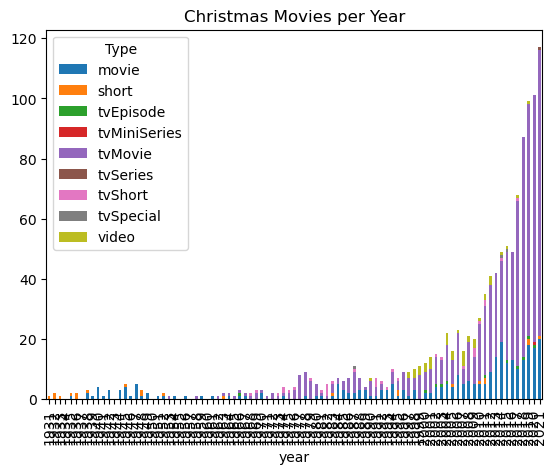

In [27]:
pdf.plot(x='year',kind='bar', stacked=True, title='Christmas Movies per Year')

In [28]:
pdf.head()

Type,year,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video
0,1931,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1932,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1933,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1935,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
pdf=pdf[['year','movie','tvMovie']].rename(columns = {'tvMovie':'Made for TV Movie', 'movie':'Movie'})

pdf.columns

Index(['year', 'Movie', 'Made for TV Movie'], dtype='object', name='Type')

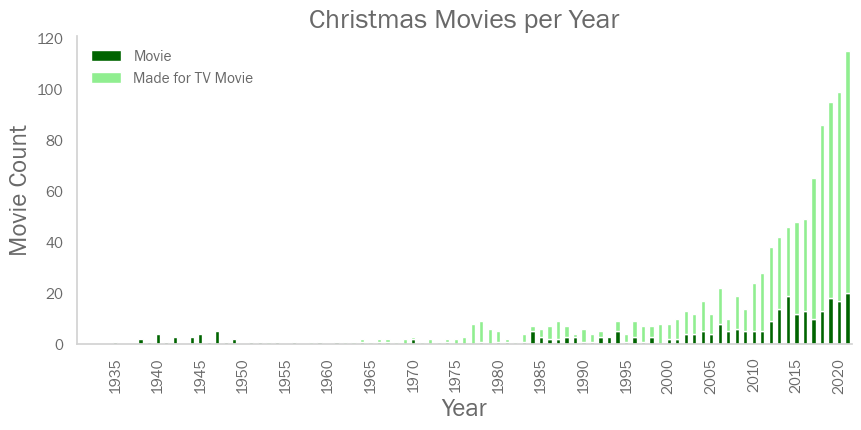

In [71]:
fig, ax = plt.subplots(1,1)

pdf.plot(x='year', kind='bar', stacked=True, title='Christmas Movies per Year', ax=ax, color = ['darkgreen','lightgreen'])

_ = plt.xticks(pdf.loc[lambda df: pdf.year % 5 == 0].index)
ax.set_ylabel("Movie Count")
ax.set_xlabel("Year")

sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False,
 'figure.figsize':(10,4)
        })
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})
_ = plt.legend(frameon=False)

In [92]:
ratings_per_year = main_pdf[['averageRating','year']].groupby('year', dropna=True).mean().reset_index()
all_years = pd.DataFrame(data = np.arange(1931,2022))
all_years.rename(columns = {0 : "year"}, inplace = True)

ratings_per_year = pd.merge(left = all_years, right = ratings_per_year, how = 'left')

total_movies_per_year = main_pdf[['tconst','year']].groupby(['year']).count().reset_index().rename(columns={'tconst':'Movie Count'})
ratings_per_year=pd.merge(left = ratings_per_year, right = total_movies_per_year, how = 'left')

ratings_per_year.columns

Index(['year', 'averageRating', 'Movie Count'], dtype='object')

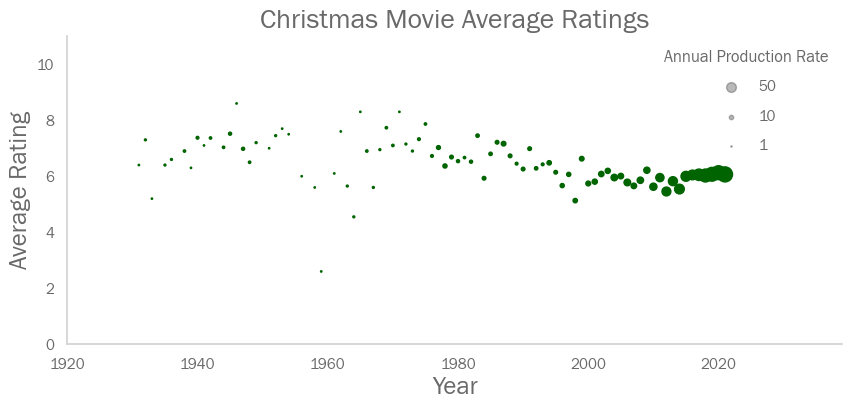

In [175]:
fig, ax = plt.subplots()

x=ratings_per_year[['year']].to_numpy()
y=ratings_per_year[['averageRating']].to_numpy()
s= ratings_per_year[['Movie Count']].to_numpy()

scatter=plt.scatter(x=x, y=y, s=s, color = ['darkgreen'])


sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False,
 'figure.figsize':(10,4)
        })
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

for s in [50, 10, 1]:
    plt.scatter([], [], c='k', alpha=0.3, s=s,
                label=str(s))
_ = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Annual Production Rate')

_ = ax.set_ylim(0, 11)
_ = ax.set_xlim(1920, 2039)
_ = ax.set_ylabel("Average Rating")
_ = ax.set_xlabel("Year")
_ = ax.set_title('Christmas Movie Average Ratings')

<AxesSubplot:xlabel='year'>

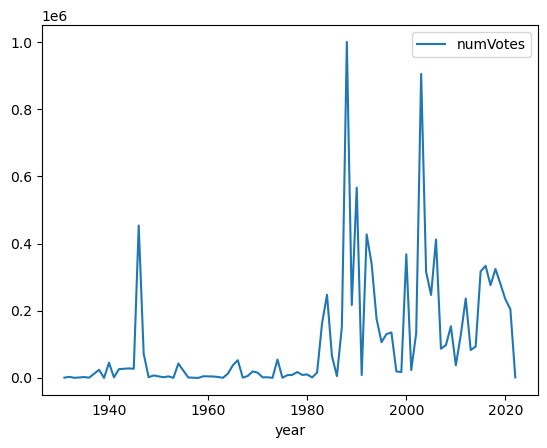

In [214]:
reviews_per_year = main_pdf[['numVotes','year']].groupby('year', dropna=True).sum()
reviews_per_year.plot()

In [183]:
movies_pdf=main_pdf[main_pdf['Type'].isin(['movie','tvMovie','short','tvShort','tvSpecial'])]
movies_pdf.quantile(0.3)

Unnamed: 0         359.6
year              2007.0
runtimeMinutes      84.0
averageRating        5.8
numVotes           592.6
Name: 0.3, dtype: float64

In [185]:
movies_pdf[movies_pdf['numVotes']>592].sort_values(by=['averageRating','numVotes'],ascending=False).head(10)

,Unnamed: 0,tconst,year,title,originalTitle,Type,runtimeMinutes,genres_list,averageRating,numVotes
5,652,tt0038650,1946,It's a Wonderful Life,It's a Wonderful Life,movie,130.0,"['Drama', 'Family', 'Fantasy']",8.6,453750
9,627,tt0060345,1966,How the Grinch Stole Christmas!,How the Grinch Stole Christmas!,tvMovie,26.0,"['Animation', 'Comedy', 'Family']",8.3,51664
8,30,tt0059026,1965,A Charlie Brown Christmas,A Charlie Brown Christmas,tvMovie,25.0,"['Animation', 'Comedy', 'Drama']",8.3,37734
11,1044,tt0067209,1971,The Homecoming: A Christmas Story,The Homecoming: A Christmas Story,tvMovie,100.0,"['Drama', 'Family']",8.3,1820
12,512,tt0095016,1988,Die Hard,Die Hard,movie,132.0,"['Action', 'Thriller']",8.2,872646
14,1111,tt0084701,1982,The Snowman,The Snowman,tvShort,26.0,"['Animation', 'Family', 'Fantasy']",8.2,14726
13,529,tt0075988,1977,Emmet Otter's Jug-Band Christmas,Emmet Otter's Jug-Band Christmas,tvMovie,48.0,"['Comedy', 'Drama', 'Family']",8.2,3993
17,679,tt4729430,2019,Klaus,Klaus,movie,96.0,"['Adventure', 'Animation', 'Comedy']",8.1,148542
16,164,tt0251282,1987,A Muppet Family Christmas,A Muppet Family Christmas,tvMovie,47.0,"['Comedy', 'Family', 'Musical']",8.1,4052
15,95,tt0272045,1987,Claymation Christmas Celebration,Claymation Christmas Celebration,tvSpecial,24.0,"['Animation', 'Comedy', 'Family']",8.1,852


In [187]:
best=movies_pdf[movies_pdf['numVotes']>592].sort_values(by=['averageRating','numVotes'],ascending=False).head(10)
best.to_csv('best_movies.csv')

In [210]:
best=best.set_index(np.arange(1,11))
best

,Title,Year,tconst,Runtime (Minutes),Average Rating,Number of Votes
1,It's a Wonderful Life,1946,tt0038650,130.0,8.6,453750
2,How the Grinch Stole Christmas!,1966,tt0060345,26.0,8.3,51664
3,A Charlie Brown Christmas,1965,tt0059026,25.0,8.3,37734
4,The Homecoming: A Christmas Story,1971,tt0067209,100.0,8.3,1820
5,Die Hard,1988,tt0095016,132.0,8.2,872646
6,The Snowman,1982,tt0084701,26.0,8.2,14726
7,Emmet Otter's Jug-Band Christmas,1977,tt0075988,48.0,8.2,3993
8,Klaus,2019,tt4729430,96.0,8.1,148542
9,A Muppet Family Christmas,1987,tt0251282,47.0,8.1,4052
10,Claymation Christmas Celebration,1987,tt0272045,24.0,8.1,852


In [207]:
best=best[['title','year','tconst','runtimeMinutes','averageRating','numVotes']]\
  .rename(columns={'title':'Title','year':'Year','runtimeMinutes':'Runtime (Minutes)','averageRating':'Average Rating','numVotes':'Number of Votes'})\
  .set_index(np.arange(1,11))
best

KeyError: "['title', 'year', 'runtimeMinutes', 'averageRating', 'numVotes'] not in index"

In [186]:
movies_pdf[movies_pdf['numVotes']>592].sort_values(by=['averageRating','numVotes'],ascending=False).tail(10)

,Unnamed: 0,tconst,year,title,originalTitle,Type,runtimeMinutes,genres_list,averageRating,numVotes
1170,687,tt2359137,2012,Last Ounce of Courage,Last Ounce of Courage,movie,101.0,"['Drama', 'War']",3.5,2066
1171,1006,tt0059032,1966,The Christmas That Almost Wasn't,Il Natale che quasi non fu,movie,94.0,"['Family', 'Fantasy']",3.5,869
1174,463,tt2202798,2012,Christmas Twister,Christmas Twister,tvMovie,86.0,"['Action', 'Adventure', 'Drama']",3.4,966
1179,882,tt3922810,2014,Santa Claws,Santa Claws,movie,86.0,"['Family', 'Fantasy']",3.0,812
1183,784,tt0367623,2003,Christmas Vacation 2: Cousin Eddie's Island Ad...,Christmas Vacation 2: Cousin Eddie's Island Ad...,tvMovie,83.0,['Comedy'],2.7,3496
1185,879,tt0058548,1964,Santa Claus Conquers the Martians,Santa Claus Conquers the Martians,movie,81.0,"['Adventure', 'Comedy', 'Family']",2.6,11851
1184,878,tt0053241,1959,Santa Claus,Santa Claus,movie,94.0,"['Comedy', 'Family', 'Fantasy']",2.6,4960
1187,889,tt0117550,1996,Santa with Muscles,Santa with Muscles,movie,97.0,['Comedy'],2.5,9100
1188,940,tt0193524,1978,The Star Wars Holiday Special,The Star Wars Holiday Special,tvMovie,97.0,"['Adventure', 'Family', 'Musical']",2.1,15503
1189,895,tt4009460,2014,Kirk Cameron's Saving Christmas,Saving Christmas,movie,79.0,"['Comedy', 'Family']",1.3,15973


In [188]:
worst=movies_pdf[movies_pdf['numVotes']>592].sort_values(by=['averageRating','numVotes'],ascending=False).tail(10)
worst.to_csv('worst_movies.csv')

In [205]:
worst=worst[['title','year','tconst','runtimeMinutes','averageRating','numVotes']]\
    .rename(columns={'title':'Title','year':'Year','runtimeMinutes':'Runtime (Minutes)','averageRating':'Average Rating','numVotes':'Number of Votes'})\
    .set_index(np.arange(10,0,-1))

worst


,Title,Year,tconst,Runtime (Minutes),Average Rating,Number of Votes
10,Last Ounce of Courage,2012,tt2359137,101.0,3.5,2066
9,The Christmas That Almost Wasn't,1966,tt0059032,94.0,3.5,869
8,Christmas Twister,2012,tt2202798,86.0,3.4,966
7,Santa Claws,2014,tt3922810,86.0,3.0,812
6,Christmas Vacation 2: Cousin Eddie's Island Ad...,2003,tt0367623,83.0,2.7,3496
5,Santa Claus Conquers the Martians,1964,tt0058548,81.0,2.6,11851
4,Santa Claus,1959,tt0053241,94.0,2.6,4960
3,Santa with Muscles,1996,tt0117550,97.0,2.5,9100
2,The Star Wars Holiday Special,1978,tt0193524,97.0,2.1,15503
1,Kirk Cameron's Saving Christmas,2014,tt4009460,79.0,1.3,15973


In [211]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.precision', 2)
pd.set_option('display.max_colwidth',100)
display(worst)

,Title,Year,tconst,Runtime (Minutes),Average Rating,Number of Votes
10,Last Ounce of Courage,2012,tt2359137,101.0,3.5,2066
9,The Christmas That Almost Wasn't,1966,tt0059032,94.0,3.5,869
8,Christmas Twister,2012,tt2202798,86.0,3.4,966
7,Santa Claws,2014,tt3922810,86.0,3.0,812
6,Christmas Vacation 2: Cousin Eddie's Island Adventure,2003,tt0367623,83.0,2.7,3496
5,Santa Claus Conquers the Martians,1964,tt0058548,81.0,2.6,11851
4,Santa Claus,1959,tt0053241,94.0,2.6,4960
3,Santa with Muscles,1996,tt0117550,97.0,2.5,9100
2,The Star Wars Holiday Special,1978,tt0193524,97.0,2.1,15503
1,Kirk Cameron's Saving Christmas,2014,tt4009460,79.0,1.3,15973
